## Are Certain Traits Unique to Stop and Frisk Allegations?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, os, time, datetime
%matplotlib inline

In [2]:
#Data Source: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i
df = pd.read_csv('ccrb_nypd_20170207.csv')
df.dropna(subset=['Allegation Description'], inplace = True) #3 data points as null
df.head(10)

,DateStamp,UniqueComplaintId,Close Year,Received Year,Borough of Occurrence,Is Full Investigation,Complaint Has Video Evidence,Complaint Filed Mode,Complaint Filed Place,Complaint Contains Stop & Frisk Allegations,Incident Location,Incident Year,Encounter Outcome,Reason For Initial Contact,Allegation FADO Type,Allegation Description
0,02/07/2017,6,2006,2006,Brooklyn,False,False,Phone,IAB,False,Street/highway,2006,No Arrest or Summons,PD suspected C/V of violation/crime - street,Discourtesy,Action
1,02/07/2017,11,2006,2006,Bronx,False,False,Phone,IAB,False,Street/highway,2006,Arrest,Other,Force,Physical force
2,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Strip-searched
3,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Seizure of property
4,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Search (of person)
5,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Question and/or stop
6,02/07/2017,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Threat of arrest
7,02/07/2017,26,2006,2006,Brooklyn,False,False,Phone,IAB,False,Apartment/house,2006,No Arrest or Summons,Report-dispute,Abuse of Authority,Threat of arrest
8,02/07/2017,26,2006,2006,Brooklyn,False,False,Phone,IAB,False,Apartment/house,2006,No Arrest or Summons,Report-dispute,Discourtesy,Word
9,02/07/2017,26,2006,2006,Brooklyn,False,False,Phone,IAB,False,Apartment/house,2006,No Arrest or Summons,Report-dispute,Discourtesy,Action


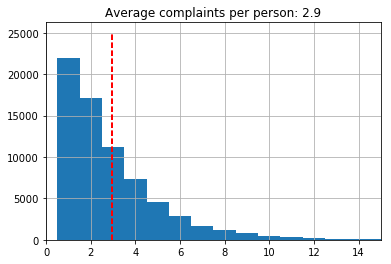

In [3]:
avg = len(df['Allegation Description'])/ len(df['UniqueComplaintId'].unique())
fig = plt.figure()
ax = fig.add_subplot(111)

df['UniqueComplaintId'].value_counts().hist(bins=np.array(range(1, 31))-0.5, ax = ax)
ax.plot([avg,avg], [0,25000],'r--',lw=2)
ax.set_xlim(0,15)
ax.set_title('Average complaints per person: 2.9')

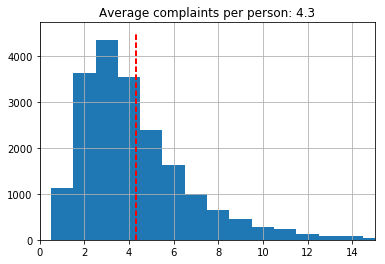

In [4]:
df_saf = df[df['Complaint Contains Stop & Frisk Allegations']]

avg = len(df_saf['Allegation Description'])/ len(df_saf['UniqueComplaintId'].unique())
fig = plt.figure()
ax = fig.add_subplot(111)

df_saf['UniqueComplaintId'].value_counts().hist(bins=np.array(range(1, 31))-0.5, ax = ax)
ax.plot([avg,avg], [0,4500],'r--',lw=2)
ax.set_xlim(0,15)
ax.set_title('Average complaints per person: 4.3')

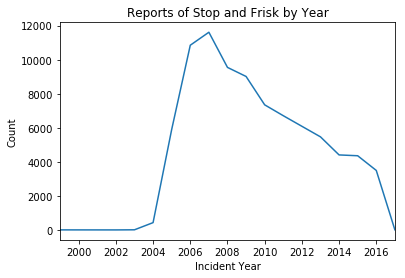

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_saf.groupby('Incident Year').count()['Close Year'].plot(ax = ax)
ax.set_ylabel('Count')
ax.set_xlabel('Incident Year')
ax.set_title('Reports of Stop and Frisk by Year')

probability of different means: 1.0


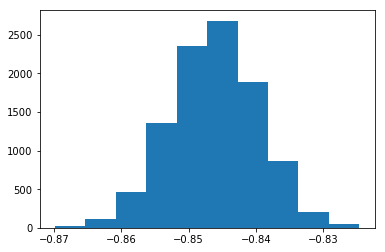

Wall time: 2min 37s


In [5]:
%%time
B = 10000

n_saf = len(df[df['Complaint Contains Stop & Frisk Allegations']])
n_no_saf = len(df[~df['Complaint Contains Stop & Frisk Allegations']])

observed = len(df_saf['Allegation Description'])/ len(df_saf['UniqueComplaintId'].unique()) - len(df['Allegation Description'])/ len(df['UniqueComplaintId'].unique())

diff_means = np.zeros(B)

for i in range(B):
    choice = np.random.choice(len(df),n_saf)
    mu_saf = n_saf/len(np.unique(np.array(df['UniqueComplaintId'])[choice]))
    mu_no_saf = n_no_saf/len(np.unique(np.array(df['UniqueComplaintId'])[-choice]))
    diff_means[i] = mu_saf - mu_no_saf

print('probability of different means:', 1.0 - np.sum(diff_means > observed )/ len(diff_means))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(diff_means)
plt.show()
#ax.plot([observed, observed], [0,250])

In [6]:
y = df['Complaint Contains Stop & Frisk Allegations'].apply(lambda x: int(x))
y.value_counts()


0    121375
1     85340
Name: Complaint Contains Stop & Frisk Allegations, dtype: int64